In [1]:
#  Question 2 - Verify data quality. Are there missing values? Duplicate data? Outliers? Are those
# mistakes? How do you deal with these problems? [20 marks]

In [54]:
import pandas as pd

# Load the data from a CSV file
# Replace 'path_to_your_csv.csv' with the actual path to your CSV file
df = pd.read_excel("data_report1.xlsx")

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Assuming binary columns are only 'Y' or 'N' and categorical columns have specific categories
binary_columns = ['frisked', 'knifcuti', 'pf_wall']  # Replace with your actual binary columns
categorical_columns = {
    'sex': ['M', 'F', 'P'],  # Replace with your actual sex categories
    'race': ['B', 'Q', 'W']  # Replace with your actual race categories
}

# Function to detect outliers in binary columns
def binary_outliers(df, columns):
    outliers = {}
    for col in columns:
        outliers[col] = df[~df[col].isin(['Y', 'N'])][col].unique().tolist()
    return outliers

# Function to detect outliers in categorical columns
def categorical_outliers(df, columns):
    outliers = {}
    for col, categories in columns.items():
        outliers[col] = df[~df[col].isin(categories)][col].unique().tolist()
    return outliers

binary_outliers_detected = binary_outliers(df, binary_columns)
categorical_outliers_detected = categorical_outliers(df, categorical_columns)

# Create a summary report
report = {
    'missing_values': missing_values,
    'duplicate_rows': duplicate_rows,
    'binary_outliers': binary_outliers_detected,
    'categorical_outliers': categorical_outliers_detected
}

print(report)

{'missing_values': frisked     0
knifcuti    0
pf_wall     0
sex         0
race        0
dtype: int64, 'duplicate_rows': 532779, 'binary_outliers': {'frisked': [], 'knifcuti': [], 'pf_wall': []}, 'categorical_outliers': {'sex': ['Z'], 'race': ['P', 'A', 'U', 'Z', 'I']}}


In [2]:
# Remove duplicate rows
df = df.drop_duplicates()

# Correcting or removing outliers in 'sex' column
# Assuming 'Z' is not a valid category, we can either remove these rows or replace them with a valid value
# Example of removing:
df = df[df['sex'] != 'Z']

# Example of replacing 'Z' with 'Unknown' (or another appropriate value):
df['sex'] = df['sex'].replace('Z', 'Unknown')


# Similar corrections would be applied to the 'race' column based on the context of the data.


# Define a dictionary for correcting known errors or mapping values
race_corrections = {
    'P': 'Known_Category_1',  # Replace 'Known_Category_1' with the actual category, if 'P' stands for something known
    'A': 'Known_Category_2',  # Do the same as above
    # 'U': 'Unknown', # Uncomment this line if you decide to label 'U' as 'Unknown'
    # 'Z': 'Other',  # Uncomment this line if 'Z' should be categorized as 'Other'
    'I': 'Known_Category_3'  # Replace with the actual category, if applicable
}

# Apply corrections
df['race'] = df['race'].replace(race_corrections)

# For values that are errors and do not have a known correction, remove those rows
# For example, if 'Z' is an error and you want to remove it:
df = df[df['race'] != 'Z']

# Alternatively, label them as 'Other' if you do not want to remove rows
df.loc[df['race'].isin(['U', 'Z']), 'race'] = 'Other'

df.head()

,frisked,knifcuti,pf_wall,sex,race
0,Y,N,N,M,B
1,N,N,N,M,Q
2,N,N,N,M,B
5,Y,N,Y,F,B
6,Y,N,N,M,Q


In [3]:
# Question-3

#  Give simple, appropriate statistics (e.g., range, mode, mean, median, variance, counts)
#  for the most important attributes in these files, and then describe what they mean or
#  whether you found something interesting. [10 marks] **


In [8]:
# For binary columns, we'll calculate the count of 'Y' and 'N' and treat 'Y' as 1, 'N' as 0 to calculate mean and variance
binary_columns = ['frisked', 'knifcuti', 'pf_wall']
binary_stats = {}
for col in binary_columns:
    df_binary = df[col].apply(lambda x: 1 if x == 'Y' else 0)
    binary_stats[col] = {
        'counts': df[col].value_counts(),
        'mean': df_binary.mean(),
        'variance': df_binary.var()
    }

# For categorical columns, we'll calculate the mode, counts, and the range (unique values)
categorical_columns = ['sex', 'race']
categorical_stats = {}
for col in categorical_columns:
    categorical_stats[col] = {
        'mode': df[col].mode().iloc[0],
        'counts': df[col].value_counts(),
        'range': df[col].unique()
    }

# Compile the statistics into a report
report = {
    'binary_stats': binary_stats,
    'categorical_stats': categorical_stats
}

# Print the report
print(report)

{'binary_stats': {'frisked': {'counts': frisked
Y    297244
N    235667
Name: count, dtype: int64, 'mean': 0.5577741874346749, 'variance': 0.2466626061277247}, 'knifcuti': {'counts': knifcuti
N    528206
Y      4705
Name: count, dtype: int64, 'mean': 0.008828866358547675, 'variance': 0.008750933898275973}, 'pf_wall': {'counts': pf_wall
N    520284
Y     12627
Name: count, dtype: int64, 'mean': 0.023694387993492348, 'variance': 0.02313300737971901}}, 'categorical_stats': {'sex': {'mode': 'M', 'counts': sex
M    487065
F     38062
Z      7784
Name: count, dtype: int64, 'range': array(['M', 'F', 'Z'], dtype=object)}, 'race': {'mode': 'B', 'counts': race
B    284229
Q    129368
W     50366
P     35772
A     17058
Z     10102
U      3759
I      2257
Name: count, dtype: int64, 'range': array(['B', 'Q', 'W', 'P', 'A', 'U', 'Z', 'I'], dtype=object)}}}


In [55]:
# Question 4 --
# Visualize the most important attributes appropriately (at least 5 attributes). [15 marks]

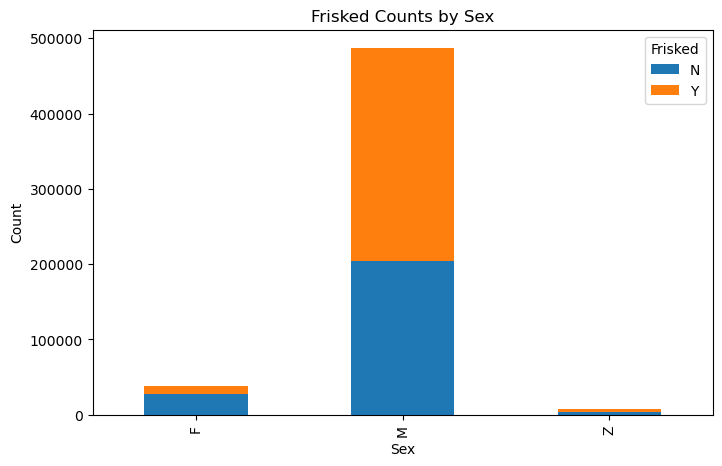

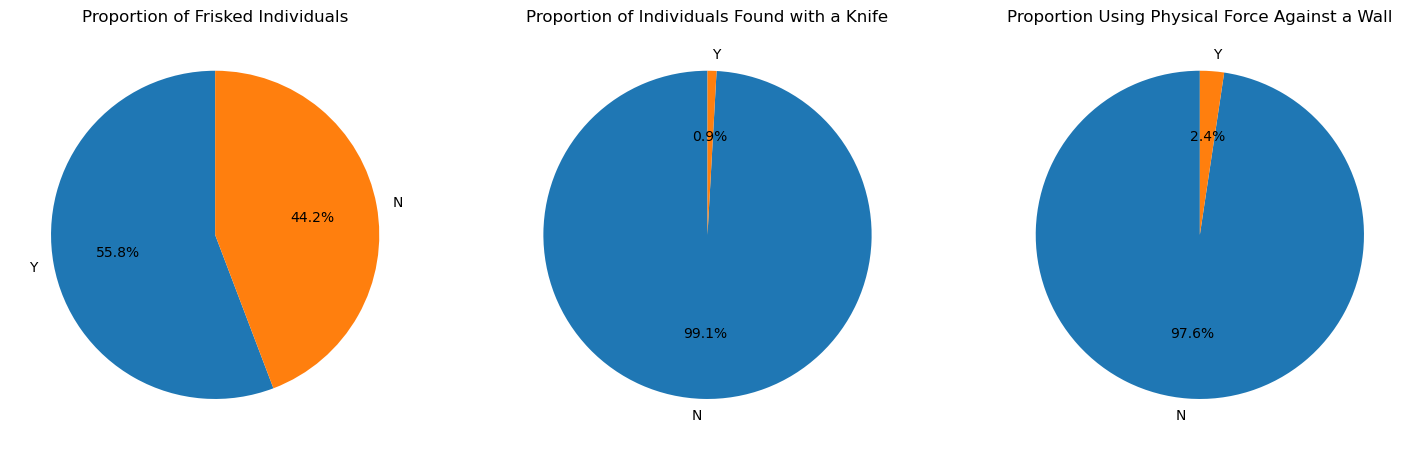

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


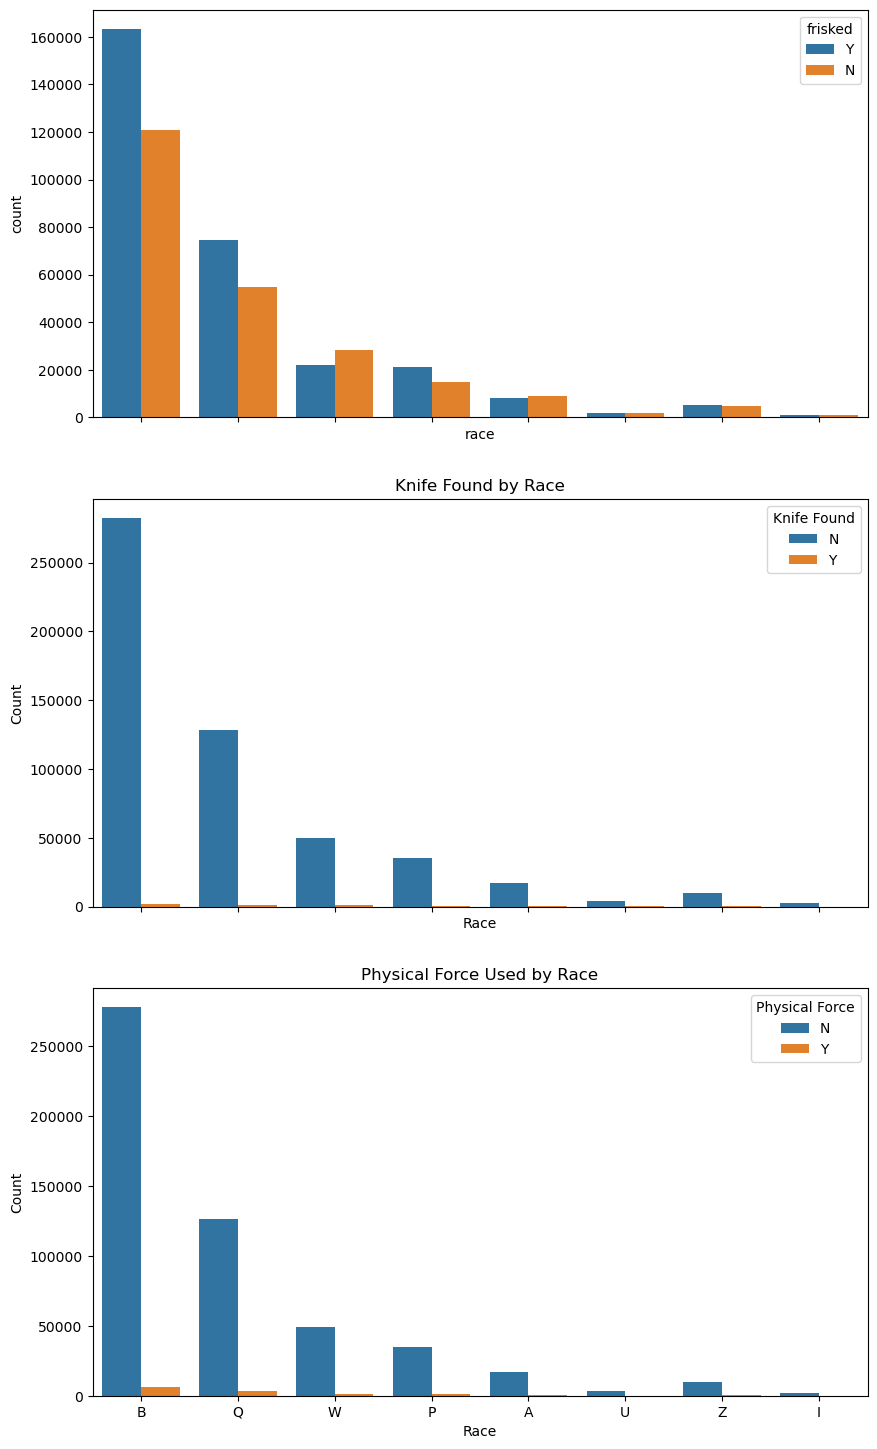

In [42]:
import matplotlib.pyplot as plt

# Cross-tabulation of 'frisked' and 'sex'
ct_frisked_sex = pd.crosstab(df['sex'], df['frisked'])

# Stacked bar chart
ct_frisked_sex.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Frisked Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Frisked')
plt.show()

# Creating pie charts for 'frisked', 'knifcuti', and 'pf_wall'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Frisked
axes[0].pie(df['frisked'].value_counts(), labels=df['frisked'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Proportion of Frisked Individuals')

# Knife Found
axes[1].pie(df['knifcuti'].value_counts(), labels=df['knifcuti'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proportion of Individuals Found with a Knife')

# Physical Force
axes[2].pie(df['pf_wall'].value_counts(), labels=df['pf_wall'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Proportion Using Physical Force Against a Wall')

plt.show()


fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Frisked by Race
sns.countplot(ax=axes[0], x='race', hue='frisked', data=df)
axes[0].set_title('Frisked by Race')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Count')
axes[0].legend(title='Frisked')

# Knife Found by Race
sns.countplot(ax=axes[1], x='race', hue='knifcuti', data=df)
axes[1].set_title('Knife Found by Race')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Count')
axes[1].legend(title='Knife Found')

# Physical Force by Race
sns.countplot(ax=axes[2], x='race', hue='pf_wall', data=df)
axes[2].set_title('Physical Force Used Against Wall by Race')
axes[2].set_xlabel('Race')
axes[2].set_ylabel('Count')
axes[2].legend(title='Physical Force')

plt.show()


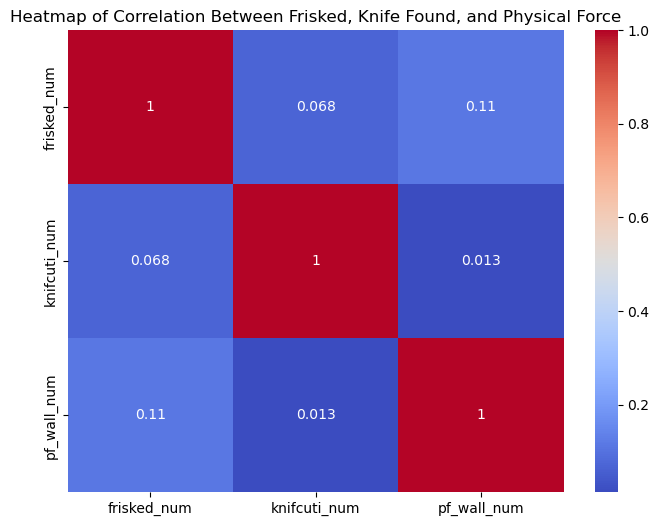

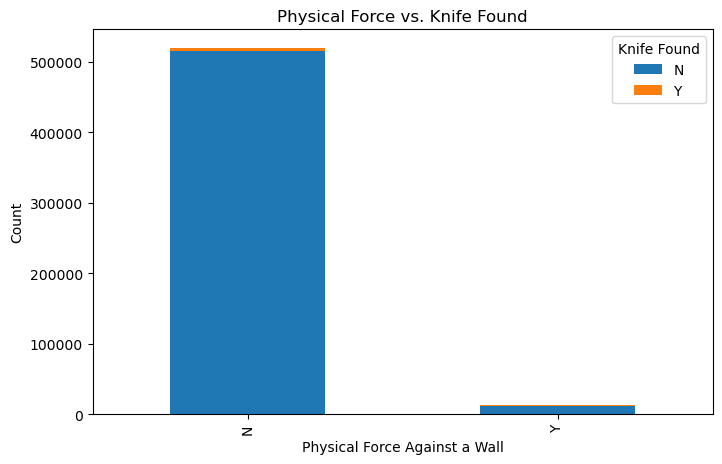

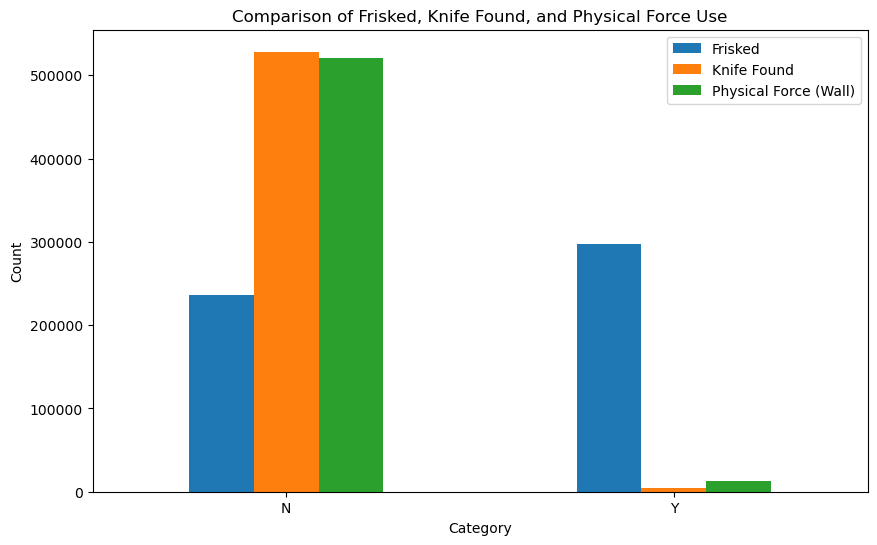

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has columns 'frisked_num', 'knifcuti_num', 'pf_wall_num'
correlation_matrix = df[['frisked_num', 'knifcuti_num', 'pf_wall_num']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Frisked, Knife Found, and Physical Force')
plt.show()

# Cross-tabulation of 'pf_wall' and 'knifcuti'
ct_pfwall_knife = pd.crosstab(df['pf_wall'], df['knifcuti'])

# Stacked bar chart
ct_pfwall_knife.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Physical Force vs. Knife Found')
plt.xlabel('Physical Force Against a Wall')
plt.ylabel('Count')
plt.legend(title='Knife Found')
plt.show()


# Preparing the data: counting occurrences
data = {
    'Frisked': df['frisked'].value_counts(),
    'Knife Found': df['knifcuti'].value_counts(),
    'Physical Force (Wall)': df['pf_wall'].value_counts()
}

# Converting dictionary to DataFrame for plotting
plot_data = pd.DataFrame(data)

# Plotting
plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Frisked, Knife Found, and Physical Force Use')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the category labels horizontal
plt.show()

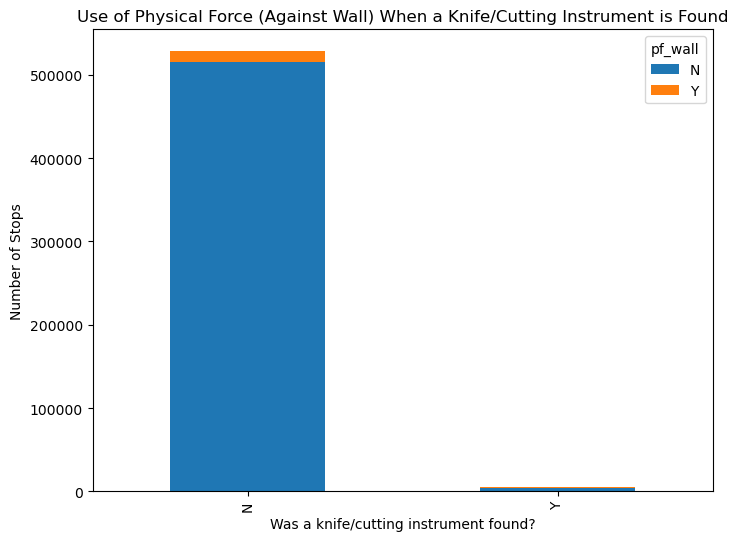

In [56]:
df['knifcuti_num'] = df['knifcuti'].map({'Y': 1, 'N': 0})
df['pf_wall_num'] = df['pf_wall'].map({'Y': 1, 'N': 0})

# Cross-tabulation between 'knifcuti' and 'pf_wall'
ct_knifcuti_pfwall = pd.crosstab(df['knifcuti'], df['pf_wall'])

# Visualization of the cross-tabulation
ct_knifcuti_pfwall.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Use of Physical Force (Against Wall) When a Knife/Cutting Instrument is Found')
plt.xlabel('Was a knife/cutting instrument found?')
plt.ylabel('Number of Stops')
plt.show()